In [2]:
from datetime import datetime
from tables import open_file
import numpy as np

computed = open_file("/data/Indexed_TLE/precomp_reduced.h5", mode="r")
sat_group = computed.get_node("/sat")

In [77]:
class SatelliteDataReader:
    def __init__(self, h5_node):
            self.node = h5_node

    def _norad_id_to_node(self, norad_id: int) -> str:
        return "s" + str(norad_id)
            
    def get_norad_ids(self):
        """
        Get a set containing all the norad ids that are contained by this archive.
        """
        return list(sorted(int(k.replace("s", "")) for k in dir(self.node) if not k.startswith("_")))

    def _get_norad_node(self, norad_id: int):
        name = self._norad_id_to_node(norad_id)
        assert hasattr(self.node, name), "No Data for satellite with norad ID: %i" % norad_id
        return getattr(self.node, name)        
    
    def get_timespan(self, norad_id: int):
        node = self._get_norad_node(norad_id)
        times = node[0, :]
        first = datetime.utcfromtimestamp(float(times.min()))
        last = datetime.utcfromtimestamp(float(times.max()))
        return first, last
    
    def get_precomputed_tracks(self, norad_id: int, start: datetime, end: datetime):
        """
        Return telemetry for the satellite with a given `norad_id` from `start` to `end` datetimes.
        The array returned will have a size (4,n) where `n` corresponds to the
        number of integer minutes between the starting points of the two times.
        
        times, lats, longs, dist = get_precomputed_tracks(...)
        
        This returns an array:
        @returns np.array (4, times)
        """
        self._get_norad_node(norad_id)[:]

        start_index = np.searchsorted(dataz[0, :], start.timestamp())
        end_index   = np.searchsorted(dataz[0, :], end.timestamp())
        return dataz[:, start_index: end_index]

In [78]:
import random

sdr = SatelliteDataReader(sat_group)
all_ids = sdr.get_norad_ids()



In [79]:

for x in range(10):
    random_norad_id = all_ids[random.randint(0, len(all_ids))]
    print(random_norad_id, sdr.get_timespan(random_norad_id))
    # t, lat, long, dist = sdr.get_precomputed_tracks(random_norad_id, datetime(2017, 1, 10), datetime(2017, 1, 11))
    
    

18103 (datetime.datetime(2016, 12, 18, 9, 48, 48), datetime.datetime(2017, 2, 14, 20, 45, 52))
26850 (datetime.datetime(2016, 12, 18, 9, 48, 48), datetime.datetime(2017, 2, 14, 20, 45, 52))
38571 (datetime.datetime(2016, 12, 18, 9, 48, 48), datetime.datetime(2017, 2, 14, 20, 45, 52))
29959 (datetime.datetime(2016, 12, 18, 9, 48, 48), datetime.datetime(2017, 2, 14, 20, 45, 52))
18959 (datetime.datetime(2016, 12, 18, 9, 48, 48), datetime.datetime(2017, 2, 14, 20, 45, 52))
11131 (datetime.datetime(2016, 12, 18, 9, 48, 48), datetime.datetime(2017, 2, 14, 20, 45, 52))
3842 (datetime.datetime(2016, 12, 18, 9, 48, 48), datetime.datetime(2017, 2, 14, 20, 45, 52))
10991 (datetime.datetime(2016, 12, 18, 9, 48, 48), datetime.datetime(2017, 2, 14, 20, 45, 52))
35141 (datetime.datetime(2016, 12, 18, 9, 48, 48), datetime.datetime(2017, 2, 14, 20, 45, 52))
20776 (datetime.datetime(2016, 12, 18, 9, 48, 48), datetime.datetime(2017, 2, 14, 20, 45, 52))


In [71]:
from pylab import plot
lat

array([56.52113 , 60.203568, 63.855057, ..., 63.681427, 60.02933 ,
       56.3468  ], dtype=float32)

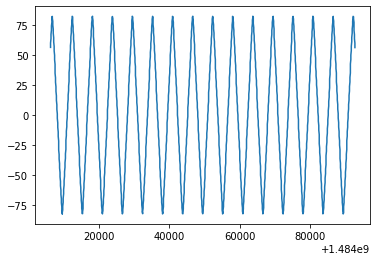

In [63]:
plot(t, lat)

In [ ]:
plot(t[0:1300], long[0:1300])

In [80]:
datetime?